# Titanic: Machine Learning from Disaster


Predict survival on the Titanic and get familiar with ML basics


Reference:
[Mario Filho - Data Science](https://youtu.be/1UVizW6eFrY)

In [56]:
# Imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

In [60]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [87]:
# Load of files
gender_submission = pd.read_csv("../input/titanic/gender_submission.csv")
test = pd.read_csv("../input/titanic/test.csv")
train = pd.read_csv("../input/titanic/train.csv")

In [35]:
# train.head()
# gender_submission.head()
# test.head()

In [88]:
# Define a numeric value for the sex
def convert_sex(value):
    if value == 'female':
        return 1
    else:
        return 0

# Append a new column with the numeric value for the sex
train['Sex_binary'] = train['Sex'].map(convert_sex)
test['Sex_binary'] = test['Sex'].map(convert_sex)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Definitions: features, train, valid

In [90]:
features = ['Sex_binary', 'Age', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Selection the features, add default value and define the target feature
X = train[features].fillna(-1)
y = train['Survived']

# Split train and test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

## Execute cross validation

In [81]:
# Cross validation

results = []
rkf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=9)

for line_train, line_test in kfold.split(X):
    # Load the group of data
    X_train, X_valid = X.iloc[line_train], X.iloc[line_test]
    y_train, y_valid = y.iloc[line_train], y.iloc[line_test]
    
    model = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
    model.fit(X_train, y_train)
    
    y_predict = model.predict(X_valid)
    accuracy = np.mean(y_valid == y_predict)
    
    results.append(accuracy)
    #print("Accuracy:", accuracy)
#print("")
print("Mean of results:", np.mean(results))

Mean of results: 0.819304152637486


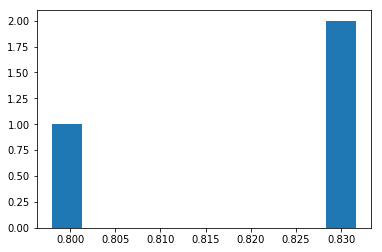

In [82]:
pylab.hist(results);

## Build baseline

In [92]:
# Build model
model = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)

# Fit the model
model.fit(X, y)

X_predicts = test[features].fillna(-1)
y_predicts = model.predict(X_predicts)

## Build submission file

In [93]:
# Convert in Series
y_series = pd.Series(y_predicts, index=test['PassengerId'], name="Survived")

# Write a csv file
y_series.to_csv("predict_model.csv", header=True)

In [94]:
!head -n10 first_model.csv

PassengerId,Survived
892,0
893,1
894,0
895,1
896,1
897,0
898,1
899,0
900,1
